In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Fixed S, plot number of comparisons w.r.t. size

In [83]:
df = pd.read_csv('../data/key_comp_8.csv')
df

,comps,size
0,8691,1000
1,19389,2000
2,30904,3000
3,42848,4000
4,55261,5000
...,...,...
994,18573959,995000
995,18594842,996000
996,18613838,997000
997,18634804,998000


In [84]:
theory = np.log10(df['size']) * df['size'] * 5
theory

0      1.500000e+04
1      3.301030e+04
2      5.215682e+04
3      7.204120e+04
4      9.247425e+04
           ...     
994    2.983917e+07
995    2.987133e+07
996    2.990350e+07
997    2.993566e+07
998    2.996783e+07
Name: size, Length: 999, dtype: float64

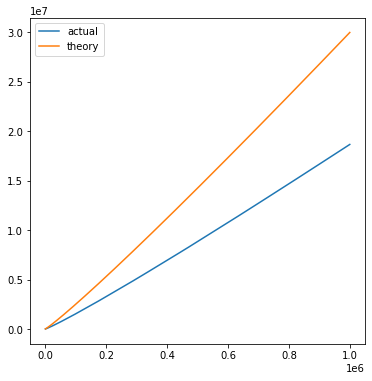

In [85]:
f = plt.figure(figsize=(6, 6))
plt.plot(df['size'], df['comps'], label='actual')
plt.plot(df['size'], theory, label='theory')
plt.legend()
plt.show()

X axis: size of input array
Y axis: number of key comparisons

We can find constants $C = 5, n_0 = 10^5$ such that $f(n) < C*(n*lg(n))$ holds when $n > n_0$.  
Thus the complexity of the integrated sort is $O(nlg(n))$.

## Find Optimal S

Count number of key comparisons with different S values, sorting data of size 1e4, 1e5, 1e6, 1e7.

``` c++
    std::vector<int> res;
    std::vector<int> thresholds;
    for (int i = 4; i < 32; i += 1)
        thresholds.push_back(i);
    
    for (auto threshold : thresholds) {
        shuffle_vec(arr.begin(), arr.end());
        KEY_COMPS = 0;
        integrated_sort(arr, threshold);
        res.push_back(KEY_COMPS);
    }
```

### Size 1e4

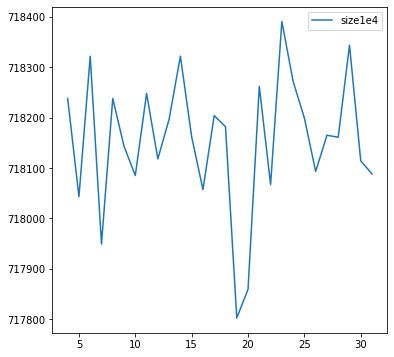

In [86]:
df_e4 = pd.read_csv("../data/optimal_S_1e4.csv")
f = plt.figure(figsize=(6, 6))
plt.plot(df_e4['S'], df_e4['time'], label='size1e4')
plt.legend()
plt.show()

X axis: S value
Y axis: number of key comparisions

### Size 1e5

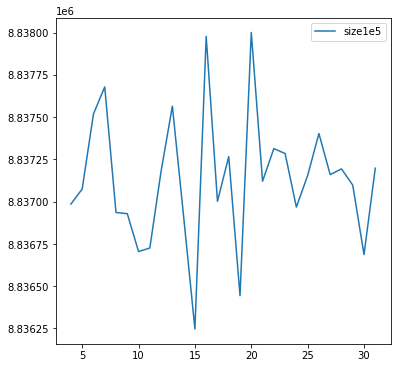

In [28]:
df_e5 = pd.read_csv("../data/optimal_S_1e5.csv")
f = plt.figure(figsize=(6, 6))
plt.plot(df_e5['S'], df_e5['time'], label='size1e5')
plt.legend()
plt.show()

X axis: S value
Y axis: number of key comparisions

### Size 1e6

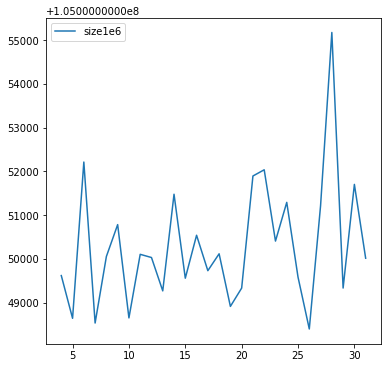

In [87]:
df_e6 = pd.read_csv("../data/optimal_S_1e6.csv")
f = plt.figure(figsize=(6, 6))
plt.plot(df_e6['S'], df_e6['time'], label='size1e6')
plt.legend()
plt.show()

X axis: S value
Y axis: number of key comparisions

### Size 1e7

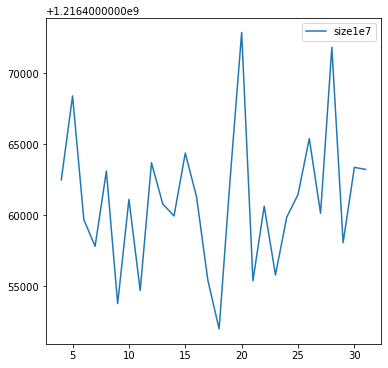

In [88]:
df_e7 = pd.read_csv("../data/optimal_S_1e7.csv")
f = plt.figure(figsize=(6, 6))
plt.plot(df_e7['S'], df_e7['time'], label='size1e7')
plt.legend()
plt.show()

X axis: S value
Y axis: number of key comparisions

Optimal value of S is in the range [15, 20].  
We choose **16** as our S value.

## Compare with Merge Sort

### Soring data of size 1e7

``` cpp
    KEY_COMPS = 0;
    shuffle_vec(arr.begin(), arr.end());
    auto start = std::chrono::high_resolution_clock::now();
    SORTING::integrated_sort(arr, 1);
    auto t1 = std::chrono::high_resolution_clock::now();
    int key_comps1 = KEY_COMPS;
    
    shuffle_vec(arr.begin(), arr.end());
    KEY_COMPS = 0;
    auto t2 = std::chrono::high_resolution_clock::now();
    SORTING::integrated_sort(arr, 16);
    auto t3 = std::chrono::high_resolution_clock::now();
    int key_comps2 = KEY_COMPS;
```

**Result**:   
Merge sort: 
- Time: 0.577076 seconds  
- Key comparisons: 220100955  

Integrated sort:  
- Time: 0.5746 seconds 
- Key comparisons: 220099134

### Sorting data of size 1e8
Merge sort:   
- Time: 6.53677 seconds  

Integrated sort:  
- Time: 6.49477 seconds  

(Key comparision already out of bound)

### Compare key comparison times

In [78]:
df_merge_comp = pd.read_csv('../data/key_comp_1.csv')
df_integrated_comp = pd.read_csv('../data/key_comp_16.csv')


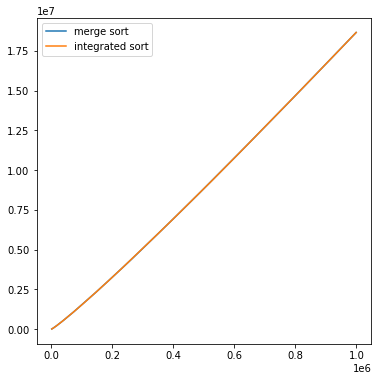

In [79]:
f = plt.figure(figsize=(6, 6))
plt.plot(df_merge_comp['size'], df_merge_comp['comps'], label='merge sort')
plt.plot(df_integrated_comp['size'], df_integrated_comp['comps'], label='integrated sort')
plt.legend()
plt.show()

No obvious difference.

### Compare exectution time

In [80]:
df_merge = pd.read_csv('../data/val_S_1.csv')
df_integrated = pd.read_csv('../data/val_S_16.csv')

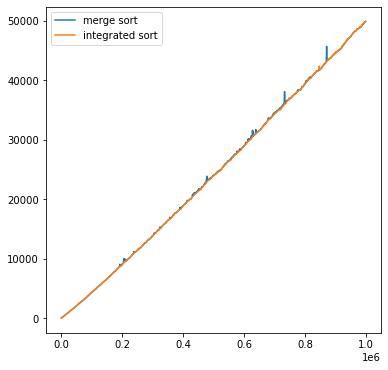

In [82]:
f = plt.figure(figsize=(6, 6))
plt.plot(df_merge['size'], df_merge['time'], label='merge sort')
plt.plot(df_integrated['size'], df_integrated['time'], label='integrated sort')
plt.legend()
plt.show()

X axis: size of input, Y axis: execution time in ms

## Conclusion
Integrated sorting is more efficent than merge sort in terms of key comparisons and execution time.